In [4]:
# 1 Data Engineering & Sampling

import json
import numpy as np
import pandas as pd

# Load metric names
with open('/kaggle/input/da5401-2025-data-challenge/metric_names.json', 'r') as f:
    metric_names = json.load(f)

# Load metric embeddings
metric_embeddings = np.load('/kaggle/input/da5401-2025-data-challenge/metric_name_embeddings.npy')

# Load train data
train_df = pd.read_csv('/kaggle/input/aug-100/augmented_train_dataset_300.csv')

# Load test data
with open('/kaggle/input/da5401-2025-data-challenge/test_data.json', 'r') as f:
    test_data = json.load(f)
test_df = pd.DataFrame(test_data)

# Check basic info and missing data
print("Train dataset info:")
print(train_df.info())
print("\nMissing values in train data:")
print(train_df.isnull().sum())

print("\n" + "="*50)
print("Test dataset info:")
print(test_df.info())
print("\nMissing values in test data:")
print(test_df.isnull().sum())

# Normalize text columns (lowercase) and handle missing values
for col in ['user_prompt', 'system_prompt', 'response']:
    train_df[col] = train_df[col].fillna('').str.lower()
    test_df[col] = test_df[col].fillna('').str.lower()

# Convert score to numeric type (float)
train_df['score'] = pd.to_numeric(train_df['score'], errors='coerce')

# Check for any remaining missing scores
print("\n" + "="*50)
print(f"Missing scores after conversion: {train_df['score'].isnull().sum()}")

print(f"Full training set size: {len(train_df)}")
print(f"Test set size: {len(test_df)}")
print(f"Number of unique metrics: {len(metric_names)}")
print(f"Metric embeddings shape: {metric_embeddings.shape}")


Train dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6424 entries, 0 to 6423
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   metric_name    6424 non-null   object
 1   score          6424 non-null   int64 
 2   user_prompt    6424 non-null   object
 3   response       6424 non-null   object
 4   system_prompt  4801 non-null   object
dtypes: int64(1), object(4)
memory usage: 251.1+ KB
None

Missing values in train data:
metric_name         0
score               0
user_prompt         0
response            0
system_prompt    1623
dtype: int64

Test dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3638 entries, 0 to 3637
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   metric_name    3638 non-null   object
 1   user_prompt    3638 non-null   object
 2   response       3637 non-null   object
 3   system_prompt  2

In [5]:
train_df.head()

,metric_name,score,user_prompt,response,system_prompt
0,dialogue_coherence/contradiction_across_turns,9,मेरे दोस्त का तो 150/100 रहता है और वो बिलकुल ...,भले ही आपके दोस्त का ब्लड प्रेशर आपसे ज़्यादा ...,you are a medical assitant. avoid contradicti...
1,hallucination_rate/citation_hallucination,9,summarize the key findings regarding the effic...,"mrna vaccines, notably those developed for cov...",you are a medical assitant. you should not ref...
2,dialogue_coherence/intra_turn_coherence,7,user\nyou are a text paraphrasing assistant.\n...,user\nyou are an ai assistant helping to creat...,"you are an agriculture bot, you need to answer..."
3,inappropriate_content_detection_rate,9,आं रांखान्थियारि जेंनाजों मोगा-मोगि जानांदों आ...,आं बुजिनो हायोदि रांखान्थियारि आंखालनि समाव आब...,you are an agriculture expert. provide practic...
4,topic_drift_rate/premature_topic_closure,7,मक्का की फसल पर जिंक की कमी के क्या लक्षण होते...,मक्का की फसल में जिंक (जस्ता) की कमी के शुरुआत...,"you are an agriculture bot, you need to answer..."


/tmp/ipykernel_39/1739046218.py:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


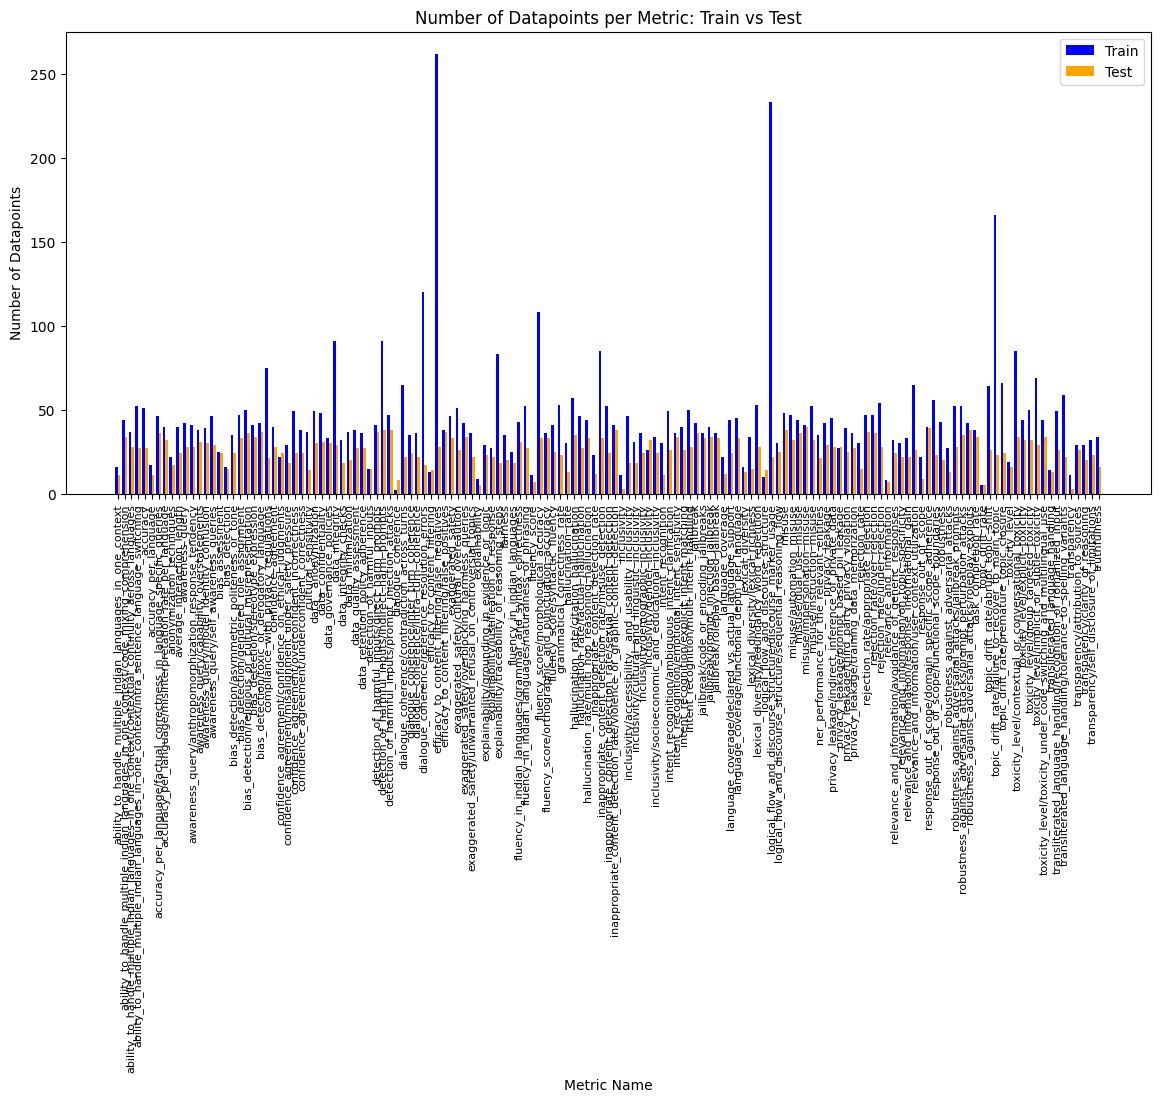

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# metric distribution

# Count datapoints per metric
train_counts = train_df['metric_name'].value_counts().sort_index()
test_counts = test_df['metric_name'].value_counts().sort_index()

# Align indices (metrics) so that train/test counts align properly
all_metrics = sorted(set(train_counts.index).union(set(test_counts.index)))
train_counts = train_counts.reindex(all_metrics, fill_value=0)
test_counts = test_counts.reindex(all_metrics, fill_value=0)

# Plotting side-by-side bars
fig, ax = plt.subplots(figsize=(14, 6))
bar_width = 0.4

indices = range(len(all_metrics))
ax.bar(indices, train_counts.values, width=bar_width, label='Train', color='blue')
ax.bar([i + bar_width for i in indices], test_counts.values, width=bar_width, label='Test', color='orange')

ax.set_xlabel('Metric Name')
ax.set_ylabel('Number of Datapoints')
ax.set_title('Number of Datapoints per Metric: Train vs Test')
ax.set_xticks([i + bar_width/2 for i in indices])
ax.set_xticklabels(all_metrics, rotation=90, fontsize=8)
ax.legend()

plt.tight_layout()
plt.show()


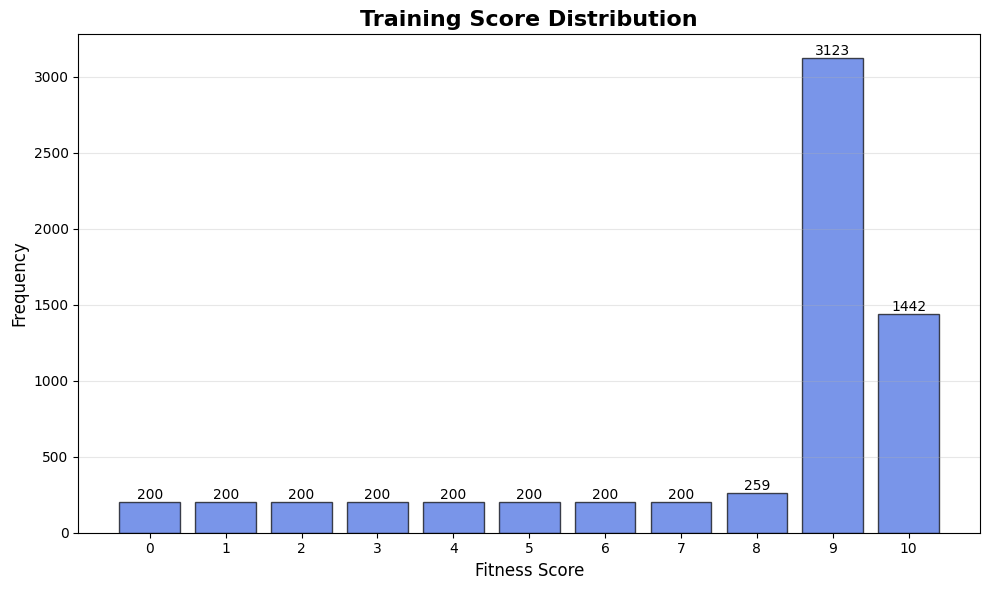

Score Distribution:
score
0      200
1      200
2      200
3      200
4      200
5      200
6      200
7      200
8      259
9     3123
10    1442
Name: count, dtype: int64

Total records: 6424
Mean score: 7.81
Median score: 9.00


In [7]:
#visualising spread of scores in train 
import matplotlib.pyplot as plt
import seaborn as sns

# Count frequency of each score
score_counts = train_df['score'].value_counts().sort_index()

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(score_counts.index, score_counts.values, color='royalblue', edgecolor='black', alpha=0.7)
plt.title('Training Score Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Fitness Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(range(0, 11))  # Show all scores 0-10
plt.grid(axis='y', alpha=0.3)

# Add value labels on top of bars
for score, count in score_counts.items():
    plt.text(score, count, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Print statistics
print("Score Distribution:")
print(score_counts)
print(f"\nTotal records: {len(train_df)}")
print(f"Mean score: {train_df['score'].mean():.2f}")
print(f"Median score: {train_df['score'].median():.2f}")


In [8]:
!pip install --upgrade transformers sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 101.8 MB/s eta 0:00:0000:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.0/488.0 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.1/566.1 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 69.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3

In [9]:
from huggingface_hub import login
import os
from kaggle_secrets import UserSecretsClient

# Log in to Hugging Face
try:
    user_secrets = UserSecretsClient()
    hf_token = user_secrets.get_secret("HF_TOKEN")
    login(token=hf_token)
    print("Hugging Face login successful.")
except:
    print("Hugging Face login failed. Make sure HF_TOKEN is set as a Kaggle Secret.")

Hugging Face login successful.


In [11]:
#creating embeddings for similarity between the prompt-response pair and metric definition
from sentence_transformers import SentenceTransformer, util
import numpy as np
import pandas as pd
import lightgbm as lgb

# --- Setup Models and Embeddings ---

model = SentenceTransformer("google/embeddinggemma-300m")

# Function for queries (user_prompt)
def embed_query_column(df, column_name, batch_size=32):
    texts = df[column_name].fillna('').tolist()
    return model.encode(
        texts, 
        batch_size=batch_size, 
        show_progress_bar=True,
        prompt_name="Retrieval-query"
    )

# Function for documents (response or combined text)
def embed_document_column(df, column_name, batch_size=32):
    texts = df[column_name].fillna('').tolist()
    return model.encode(
        texts, 
        batch_size=batch_size, 
        show_progress_bar=True,
        prompt_name="Retrieval-document"
    )

# --- Embed all text columns for TRAINING ---
print("Embedding training data...")

# 1. Embed Metric (This is a Document)
train_metric_emb = np.array([metric_embeddings[metric_names.index(name)] 
                             for name in train_df['metric_name']])

# 2. Embed User Prompt (This is a Query)
train_user_prompt_emb = embed_query_column(train_df, 'user_prompt')

# 3. Embed Response (This is a Document)
train_response_emb = embed_document_column(train_df, 'response')

# 4. NEW: Create and embed the combined "Prompt-Response Pair"
print("Creating combined Prompt-Response embeddings...")
train_df['prompt_response_pair'] = "Prompt: " + train_df['user_prompt'].fillna('') + \
                                   " | Response: " + train_df['response'].fillna('')
                                   
# Embed this new combined text as a single "Document"
train_pair_emb = embed_document_column(train_df, 'prompt_response_pair')


# --- NEW FEATURE ENGINEERING ---
print("Calculating similarity features for training data...")

# We will now create 3 features
sim_metric_pair = []  # Feature 1: The one you suggested (Metric vs Pair)
sim_metric_resp = []  # Feature 2: Metric vs Response (still useful)
sim_prompt_resp = []  # Feature 3: Prompt vs Response (still useful)

for i in range(len(train_metric_emb)):
    # 1. Similarity(Metric, Prompt-Response Pair) -- This is the main one
    s_mp_pair = util.cos_sim(train_metric_emb[i], train_pair_emb[i]).item()
    
    # 2. Similarity(Metric, Response)
    s_mr = util.cos_sim(train_metric_emb[i], train_response_emb[i]).item()
    
    # 3. Similarity(Prompt, Response)
    s_pr = util.cos_sim(train_user_prompt_emb[i], train_response_emb[i]).item()
    
    sim_metric_pair.append(s_mp_pair)
    sim_metric_resp.append(s_mr)
    sim_prompt_resp.append(s_pr)

# Create a new, simple feature matrix (n, 3)
X_train = np.array([
    sim_metric_pair,
    sim_metric_resp,
    sim_prompt_resp
]).T  # Transpose to get (n, 3) shape

y_train = train_df['score'].values
print(f"New X_train shape: {X_train.shape}")


# --- Embed all text columns for TEST ---
print("\nEmbedding test data...")
test_metric_emb = np.array([metric_embeddings[metric_names.index(name)] 
                            for name in test_df['metric_name']])
test_user_prompt_emb = embed_query_column(test_df, 'user_prompt')
test_response_emb = embed_document_column(test_df, 'response')

print("Creating combined Prompt-Response embeddings for test...")
test_df['prompt_response_pair'] = "Prompt: " + test_df['user_prompt'].fillna('') + \
                                  " | Response: " + test_df['response'].fillna('')
test_pair_emb = embed_document_column(test_df, 'prompt_response_pair')


# --- NEW FEATURE ENGINEERING (Test Data) ---
print("Calculating similarity features for test data...")
test_sim_metric_pair = []
test_sim_metric_resp = []
test_sim_prompt_resp = []

for i in range(len(test_metric_emb)):
    s_mp_pair = util.cos_sim(test_metric_emb[i], test_pair_emb[i]).item()
    s_mr = util.cos_sim(test_metric_emb[i], test_response_emb[i]).item()
    s_pr = util.cos_sim(test_user_prompt_emb[i], test_response_emb[i]).item()
    
    test_sim_metric_pair.append(s_mp_pair)
    test_sim_metric_resp.append(s_mr)
    test_sim_prompt_resp.append(s_pr)

X_test = np.array([
    test_sim_metric_pair,
    test_sim_metric_resp,
    test_sim_prompt_resp
]).T
print(f"New X_test shape: {X_test.shape}")

Embedding training data...


Batches:   0%|          | 0/201 [00:00<?, ?it/s]

Batches:   0%|          | 0/201 [00:00<?, ?it/s]

Creating combined Prompt-Response embeddings...


Batches:   0%|          | 0/201 [00:00<?, ?it/s]

Calculating similarity features for training data...
New X_train shape: (6424, 3)

Embedding test data...


Batches:   0%|          | 0/114 [00:00<?, ?it/s]

Batches:   0%|          | 0/114 [00:00<?, ?it/s]

Creating combined Prompt-Response embeddings for test...


Batches:   0%|          | 0/114 [00:00<?, ?it/s]

Calculating similarity features for test data...
New X_test shape: (3638, 3)


In [12]:
import numpy as np
import os

# Create output directory if needed (Kaggle automatically makes /kaggle/working available)
output_dir = '/kaggle/working/'

# Save training features and targets
np.save(os.path.join(output_dir, 'X_train_gemma_200_sims.npy'), X_train)
np.save(os.path.join(output_dir, 'y_train_200_gemma.npy'), y_train)

# Save test features
np.save(os.path.join(output_dir, 'X_test_gemma_sims.npy'), X_test)

# Save DataFrames for reproducibility
#train_df.to_csv(os.path.join(output_dir, 'train_df_with_ids.csv'), index=False)
#test_df.to_csv(os.path.join(output_dir, 'test_df_with_ids.csv'), index=False)

print(f"Files saved to {output_dir}:")
print(os.listdir(output_dir))


Files saved to /kaggle/working/:
['.virtual_documents', 'X_test_gemma_sims.npy', 'X_train_gemma_200_sims.npy', 'y_train_200_gemma.npy']


In [14]:
#MODEL #1
print(f"Original X_train shape: {X_train.shape}")

X_train1 = X_train[:, [0]]
X_test1 = X_test[:, [0]]

print(f"New X_train shape (1 feature): {X_train1.shape}")
print(f"New X_test shape (1 feature): {X_test1.shape}")

import lightgbm as lgb
# Ensure y_train_discrete is a pandas Series for mapping
y_train_discrete = pd.Series(y_train)

# Frequency counts of each discrete target score
counts = y_train_discrete.value_counts()
total = len(y_train_discrete)

# Inverse frequency as weights
inv_freq_exp = total / (counts)

# Map each training sample's target to its inverse frequency weight
sample_weights = y_train_discrete.map(inv_freq_exp).to_numpy()

# Create LightGBM Dataset with sample weights
train_data = lgb.Dataset(X_train1, label=y_train_discrete, weight=sample_weights)

# Training parameters with GPU
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'verbosity': -1,
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'max_depth': 6,
    'device': 'gpu',
    'gpu_platform_id': 0,
    'gpu_device_id': 0,
    'seed': 42
}

# Train model
gbm = lgb.train(params, train_data, num_boost_round=200)

# Predict on test data
lgb_test_pred = gbm.predict(X_test1, num_iteration=gbm.best_iteration)

# Clip predictions so no value is above 10
lgb_test_pred = np.clip(lgb_test_pred, a_min=None, a_max=10)

# Prepare submission DataFrame, use index+1 as ID
submission_lgb_freq = pd.DataFrame({
    'id': test_df.index + 1,
    'score': lgb_test_pred
})

# Floor and convert predictions to int before saving
submission_lgb_freq['score'] = submission_lgb_freq['score'].apply(np.floor).astype(int)

# Save submission CSV
submission_lgb_freq.to_csv('submission_gemma_model1.csv', index=False)
print("LightGBM submission saved as submission_lgb_freq.csv")


Original X_train shape: (6424, 3)
New X_train shape (1 feature): (6424, 1)
New X_test shape (1 feature): (3638, 1)


1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.


LightGBM submission saved as submission_lgb_freq.csv


In [37]:
#MODEL #2 - Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error  # Import RMSE calculation
import pandas as pd
import numpy as np

print(f"Using X_train1 shape (1 feature): {X_train1.shape}")
print(f"Using X_test1 shape (1 feature): {X_test1.shape}")


inv_freq_pow = (total / (counts)) ** 1.3

# Map each training sample's target to its inverse frequency weight
sample_weights = y_train_discrete.map(inv_freq_pow).to_numpy()

# --- New Linear Regression Model ---

# 1. Initialize the model
# We don't need any complex params
model = LinearRegression()

# 2. Train the model
# .fit() accepts sample_weight just like LightGBM
print("Training Linear Regression model...")
model.fit(X_train1, y_train_discrete, sample_weight=sample_weights)

# --- Calculate Training RMSE ---
# We calculate RMSE on the training data, as true test labels aren't available
print("Calculating Training RMSE...")
lr_train_pred = model.predict(X_train1)
train_rmse = mean_squared_error(y_train_discrete, lr_train_pred, squared=False)
print(f"Model Training RMSE: {train_rmse:.4f}")

# 3. Predict on test data
print("Predicting with Linear Regression model...")
lr_test_pred = model.predict(X_test1)

# 4. Post-processing
# Clip predictions (linear models can predict outside 0-10)
lr_test_pred = np.clip(lr_test_pred, a_min=0, a_max=10)

# Prepare submission DataFrame, use index+1 as ID
submission_lr = pd.DataFrame({
    'id': test_df.index + 1,
    'score': lr_test_pred
})

# Floor and convert predictions to int before saving
submission_lr['score'] = submission_lr['score'].apply(np.floor).astype(int)

# --- NEW: Show stats for generated CSV ---
print("\n" + "="*30)
print("Submission File Stats:")

# Calculate average
avg_score = submission_lr['score'].mean()
print(f"  Average score: {avg_score:.4f}")

# --- MODIFIED: Show count of each score ---
# Get counts for each unique score and sort them by the score (index)
score_counts = submission_lr['score'].value_counts().sort_index()
print("\n  Count of each score:")
print(score_counts)
# --- End modified block ---

# Show first 5 entries
print("\n  First 5 entries:")
print(submission_lr.head())
print("="*30 + "\n")
# --- End new block ---

# Save submission CSV with a new name
submission_lr.to_csv('submission_gemma_linear_reg_final.csv', index=False)
print("Linear Regression submission saved as submission_gemma_linear_reg_final.csv")

Using X_train1 shape (1 feature): (6424, 1)
Using X_test1 shape (1 feature): (3638, 1)
Training Linear Regression model...
Calculating Training RMSE...
Model Training RMSE: 3.0279
Predicting with Linear Regression model...

Submission File Stats:
  Average score: 6.0726

  Count of each score:
score
1       1
2      13
3     125
4     247
5     596
6    1144
7    1246
8     258
9       8
Name: count, dtype: int64

  First 5 entries:
   id  score
0   1      5
1   2      7
2   3      7
3   4      5
4   5      6

Linear Regression submission saved as submission_gemma_linear_reg_final.csv


The above Model 2 gives the current best RMS on 60% test at 3.544

In [14]:
#MODEL #3 - Ridge Regression (3 Features, 0.85 Power Weighting)
from sklearn.linear_model import Ridge
import pandas as pd
import numpy as np

print(f"Using X_train shape (3 features): {X_train.shape}")
print(f"Using X_test shape (3 features): {X_test.shape}")

# --- Calculate the 0.85Power Weights ---
# (Assumes y_train_discrete, total, and counts are in memory from previous cell)
inv_freq_pow = (total / (counts))**.85

# Map each training sample's target to its inverse frequency weight
sample_weights = y_train_discrete.map(inv_freq_pow).to_numpy()

# --- New Ridge Regression Model ---

# 1. Initialize the model
# alpha=1.0 is a good default for regularization.
model = Ridge(alpha=1.0, random_state=42)

# 2. Train the model
# We are using the FULL X_train (3 features) and the 0.8 power weights
print("Training Weighted Ridge Regression model...")
model.fit(X_train, y_train_discrete, sample_weight=sample_weights)

# 3. Predict on test data
print("Predicting with Weighted Ridge Regression model...")
ridge_test_pred = model.predict(X_test)

# 4. Post-processing
# Clip predictions (linear models can predict outside 0-10)
ridge_test_pred = np.clip(ridge_test_pred, a_min=0, a_max=10)

# Prepare submission DataFrame, use index+1 as ID
submission_ridge_weighted = pd.DataFrame({
    'id': test_df.index + 1,
    'score': ridge_test_pred
})

# Floor and convert predictions to int before saving
submission_ridge_weighted['score'] = submission_ridge_weighted['score'].apply(np.floor).astype(int)

# Save submission CSV with a new name
submission_ridge_weighted.to_csv('submission_gemma_model3.csv', index=False)
print("Weighted Ridge Regression (3 features) submission saved as submission_gemma_model3.csv")

Using X_train shape (3 features): (5000, 3)
Using X_test shape (3 features): (3638, 3)
Training Weighted Ridge Regression model...
Predicting with Weighted Ridge Regression model...
Weighted Ridge Regression (3 features) submission saved as submission_gemma_model3.csv
